### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [183]:
df = pd.read_csv('data/coupons.csv')

In [184]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [186]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [187]:
df.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [188]:
# First check for any potential duplicate rows. If there are any remove them, else continue
duplicate = df[df.duplicated(subset=None, keep=False)].reset_index()
duplicate

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,4191,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,...,never,1~3,less1,less1,1,1,1,0,1,1
1,4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,...,never,1~3,less1,less1,1,1,1,0,1,1
2,4235,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
3,4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4,4279,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,...,never,4~8,1~3,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
144,8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
145,8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
146,8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [189]:
# we found duplicate rows and hence dropping them 
df.drop_duplicates(keep='last', inplace=True)
df.dropna()
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


 ### Out of 12,684, after removing duplicates, we have 12,610 rows. 

4. What proportion of the total observations chose to accept the coupon? 



In [190]:
observation_coupon= df.groupby('Y').count()


total_coupon_accepted = observation_coupon.iloc[1]['coupon']
print("total_coupon_accepted = " + str(total_coupon_accepted))

total_coupon_rejected = observation_coupon.iloc[0]['coupon']
print("total_coupon_rejected = " + str(total_coupon_rejected))

total_coupon = total_coupon_accepted + total_coupon_rejected
print("total_coupon = " + str(total_coupon))

perc_accepted_coupon = 100 * (total_coupon_accepted/total_coupon)

print (str(np.round(perc_accepted_coupon, 2)) + "% of total observations chosed to accept the coupon ")

total_coupon_accepted = 7157
total_coupon_rejected = 5453
total_coupon = 12610
56.76% of total observations chosed to accept the coupon 


5. Use a bar plot to visualize the `coupon` column.

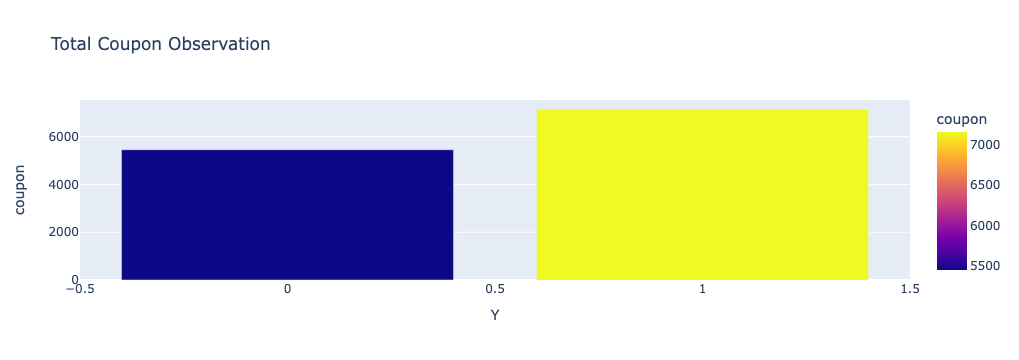

In [191]:
px.bar(observation_coupon, y='coupon', color = "coupon", title = "Total Coupon Observation")

6. Use a histogram to visualize the temperature column.

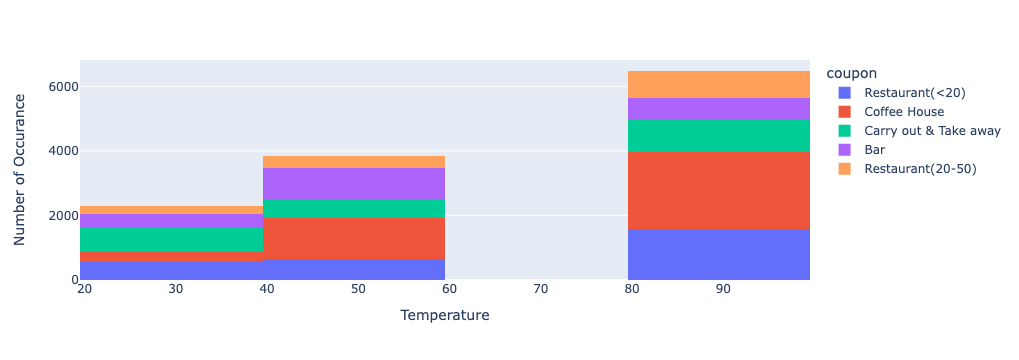

In [192]:
fig = px.histogram(df, x='temperature', color='coupon')

fig.update_xaxes(title_text="Temperature")
fig.update_yaxes(title_text="Number of Occurance")

# Display plot
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [193]:
bar_coupon = df.query("coupon == 'Bar'").reset_index()
bar_coupon

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,...,never,NaN,4~8,1~3,1,1,0,0,1,0
1,13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,...,never,NaN,4~8,1~3,1,0,0,1,0,1
2,17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,...,never,NaN,4~8,1~3,1,1,1,0,1,0
3,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,...,less1,4~8,4~8,less1,1,0,0,0,1,1
4,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2006,12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2007,12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2008,12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [194]:
observation_bar_coupon= bar_coupon.groupby('Y').count()
observation_bar_coupon

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
Y,,,,,,,,,,,,,,,,,,,,,
0,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,...,1173,1160,1178,1175,1162,1186,1186,1186,1186,1186
1,824,824,824,824,824,824,824,824,824,824,...,816,811,808,812,812,824,824,824,824,824


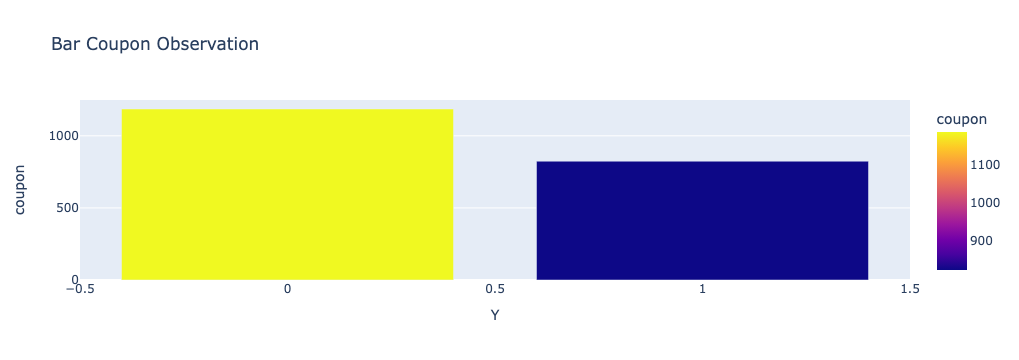

In [195]:
px.bar(observation_bar_coupon, y='coupon', color = "coupon", title = "Bar Coupon Observation")

In [196]:
total_bar_coupon_accepted = observation_bar_coupon.iloc[1]['coupon']
print("total_bar_coupon_accepted = " + str(total_bar_coupon_accepted))

total_bar_coupon_rejected = observation_bar_coupon.iloc[0]['coupon']
print("total_bar_coupon_rejected = " + str(total_bar_coupon_rejected))

total_bar_coupon = total_bar_coupon_accepted + total_bar_coupon_rejected
print("total_bar_coupon = " + str(total_bar_coupon))

perc_accepted_bar_coupon = 100 * (total_bar_coupon_accepted/total_bar_coupon)

print (str(np.round(perc_accepted_bar_coupon, 2)) + "% Bar Coupon were accepted")

total_bar_coupon_accepted = 824
total_bar_coupon_rejected = 1186
total_bar_coupon = 2010
41.0% Bar Coupon were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [197]:
# Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
bar_coupon_accepted = bar_coupon.query("Y==1").reset_index()

total_bar_coupon_accepted = bar_coupon_accepted.count()['coupon']
print("bar_coupon_accepted = " + str(total_bar_coupon_accepted))
bar_coupon_accepted

bar_coupon_accepted = 824


,level_0,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,...,never,NaN,4~8,1~3,1,0,0,1,0,1
1,3,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,...,less1,4~8,4~8,less1,1,0,0,0,1,1
2,4,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,...,less1,4~8,4~8,less1,1,0,0,1,0,1
3,5,39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,...,less1,4~8,4~8,less1,1,1,1,0,1,1
4,9,75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1985,12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,...,never,1~3,1~3,less1,1,1,0,0,1,1
820,1986,12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,...,never,1~3,1~3,less1,1,1,0,0,1,1
821,1988,12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,...,less1,1~3,1~3,less1,1,1,0,0,1,1
822,2001,12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,...,never,4~8,gt8,less1,1,1,0,0,1,1


In [198]:
bar_coupon_accepted['Bar']

0      never
1      never
2      never
3      never
4      less1
       ...  
819    never
820    never
821    never
822    less1
823    less1
Name: Bar, Length: 824, dtype: object

In [199]:
bar_coupon_accepted_less3 = bar_coupon_accepted.query("Bar == 'never' or Bar == 'less1' or Bar == '1~3'")
#bar_coupon_accepted_less31 = bar_coupon_accepted_less3.query(" Restaurant20To50 == '0' or Restaurant20To50 == 'less1' or Restaurant20To50 == '1~3'")

total_bar_coupon_accepted_less3 = bar_coupon_accepted_less3.count()['coupon']
print("total_bar_coupon_accepted_less3 = " + str(total_bar_coupon_accepted_less3))
bar_coupon_accepted_less3


total_bar_coupon_accepted_less3 = 663


,level_0,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,...,never,NaN,4~8,1~3,1,0,0,1,0,1
1,3,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,...,less1,4~8,4~8,less1,1,0,0,0,1,1
2,4,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,...,less1,4~8,4~8,less1,1,0,0,1,0,1
3,5,39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,...,less1,4~8,4~8,less1,1,1,1,0,1,1
4,9,75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1985,12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,...,never,1~3,1~3,less1,1,1,0,0,1,1
820,1986,12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,...,never,1~3,1~3,less1,1,1,0,0,1,1
821,1988,12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,...,less1,1~3,1~3,less1,1,1,0,0,1,1
822,2001,12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,...,never,4~8,gt8,less1,1,1,0,0,1,1


In [200]:
bar_coupon_accepted_more3 = bar_coupon_accepted.query("Bar == '4~8' or Bar == 'gt8'")
#bar_coupon_accepted_more31 = bar_coupon_accepted_more3.query("Restaurant20To50 == '4~8' or Restaurant20To50 == 'gt8'")

total_bar_coupon_accepted_more3 = bar_coupon_accepted_more3.count()['coupon']
print("total_bar_coupon_accepted_more3 = " + str(total_bar_coupon_accepted_more3))

bar_coupon_accepted_more3

total_bar_coupon_accepted_more3 = 153


,level_0,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12,21,156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
13,22,167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
14,23,171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
33,65,465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
37,80,569,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,...,gt8,gt8,1~3,less1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,1901,12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
789,1902,12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
790,1903,12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
791,1904,12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [201]:
acceptance_rate_less3 = 100 * (total_bar_coupon_accepted_less3/(total_bar_coupon_accepted_less3 + total_bar_coupon_accepted_more3))

print (str(np.round(acceptance_rate_less3, 2)) + "% is the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more")

81.25% is the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [202]:
# Age: below 21, 21 to 25, 26 to 30, etc.

bar_coupon_accepted_by_more1 = bar_coupon_accepted.query("Bar == '1~3' or Bar == '4~8' or Bar == 'gt8'")
bar_coupon_accepted_by_age = bar_coupon_accepted_by_more1.query("age > '25'").count()['coupon']

print("bar_coupon_accepted_by_age = " + str(bar_coupon_accepted_by_age))
print("total_bar_coupon_accepted = " + str(total_bar_coupon_accepted))
acceptance_rate_more1 = 100 * (bar_coupon_accepted_by_age/total_bar_coupon_accepted)

print (str(np.round(acceptance_rate_more1, 2)) + "% is the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others ")

bar_coupon_accepted_by_age = 296
total_bar_coupon_accepted = 824
35.92% is the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others 


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [203]:
# Passenger: alone, partner, kid(s), or friend(s); Occupation: architecture & engineering, business & financial, etc.
bar_coupon_passangers = bar_coupon_accepted_by_more1.query('passanger != "Kid(s)"')
bar_coupon_occupations = bar_coupon_passangers.query('occupation != "farming" or occupation != "fishing" or occupation != "forestry"')
count_bar_coupon_occupations_passangers = bar_coupon_occupations.count()['coupon']
print("count_bar_coupon_occupations_passangers = " + str(count_bar_coupon_occupations_passangers))
print("total_bar_coupon_accepted = " + str(total_bar_coupon_accepted))
acceptance_rate_occupations_passangers = 100 * (count_bar_coupon_occupations_passangers/total_bar_coupon_accepted)


print (str(np.round(acceptance_rate_occupations_passangers, 2)) + "% is the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to the all others ")

count_bar_coupon_occupations_passangers = 393
total_bar_coupon_accepted = 824
47.69% is the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to the all others 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [204]:
# a) go to bars more than once a month, had passengers that were not a kid, and were not widowed
#bar_coupon_accepted_by_more1
#bar_coupon_passangers
#Marital Status: single, married partner, unmarried partner, or widowed

bar_coupon_ms = bar_coupon_passangers.query("maritalStatus != 'widowed'")
count_bar_coupon_ms = bar_coupon_ms.count()['coupon']
print("count_bar_coupon_ms = " + str(count_bar_coupon_ms))
acceptance_ms = 100 * (count_bar_coupon_ms/total_bar_coupon_accepted)
print (str(np.round(acceptance_ms, 2)) + "% go to bars more than once a month, had passengers that were not a kid, and were not widowed")


count_bar_coupon_ms = 393
47.69% go to bars more than once a month, had passengers that were not a kid, and were not widowed


In [207]:
#bar_coupon_accepted_by_more1
bar_coupon_accepted_by_age_30 = bar_coupon_accepted_by_more1.query("age < '30'")
count_bar_coupon_accepted_by_age_30 = bar_coupon_accepted_by_age_30.count()['coupon']
print("count_bar_coupon_accepted_by_age_30 = " + str(count_bar_coupon_accepted_by_age_30))
acceptance_by_age_30 = 100 * (count_bar_coupon_accepted_by_age_30/total_bar_coupon_accepted)

print (str(np.round(acceptance_by_age_30, 2)) + "% is the acceptance rate for people who go to bars more than once a month and are under the age of 30")


count_bar_coupon_accepted_by_age_30 = 245
29.73% is the acceptance rate for people who go to bars more than once a month and are under the age of 30


In [208]:
#Number of times that he/she eats at a restaurant with average expense less than $20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
#Annual income: less than $12500, $12500 - $24999, $25000 - $37499, etc.
bar_coupon_accepted_by_rest = bar_coupon_accepted.query("RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8'")
total_bar_coupon_accepted_by_rest = bar_coupon_accepted_by_rest.count()['coupon']
print ("total_bar_coupon_accepted_by_rest = " + str(total_bar_coupon_accepted_by_rest))

bar_coupon_accepted_by_income = bar_coupon_accepted_by_rest.query("income == '$37500 - $49999' or income == '$25000 - $37499' or income == '$12500 - $24999' or income == 'less than $12500'")
count_bar_coupon_accepted_by_income = bar_coupon_accepted_by_income.count()['coupon']
print("count_bar_coupon_accepted_by_income = " + str(count_bar_coupon_accepted_by_income))

acceptance_by_income = 100 * (count_bar_coupon_accepted_by_income/total_bar_coupon_accepted)
print (str(np.round(acceptance_by_income, 2)) + "% is the acceptance rate for people who go to cheap restaurants more than 4 times a month and income is less than 50K")


total_bar_coupon_accepted_by_rest = 326
count_bar_coupon_accepted_by_income = 124
15.05% is the acceptance rate for people who go to cheap restaurants more than 4 times a month and income is less than 50K


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## 81.25% is the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [222]:
# Let's check the acceptance rate for Coffee House Coupons
coffee_coupon = df.query("coupon == 'Coffee House'").reset_index()
coffee_coupon

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,...,never,NaN,4~8,1~3,1,0,0,0,1,0
1,3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,...,never,NaN,4~8,1~3,1,1,0,0,1,0
2,4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,...,never,NaN,4~8,1~3,1,1,0,0,1,0
3,12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,...,never,NaN,4~8,1~3,1,1,0,0,1,1
4,15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,...,never,4~8,gt8,less1,1,1,0,0,1,0
3985,12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,...,never,4~8,gt8,less1,1,0,0,1,0,0
3986,12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,...,never,1~3,4~8,1~3,1,0,0,1,0,0
3987,12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [223]:
observation_coffee_coupon= coffee_coupon.groupby('Y').count()
observation_coffee_coupon

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
Y,,,,,,,,,,,,,,,,,,,,,
0,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,1985,1961,1977,1982,1973,2000,2000,2000,2000,2000
1,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,1967,1956,1955,1957,1961,1989,1989,1989,1989,1989


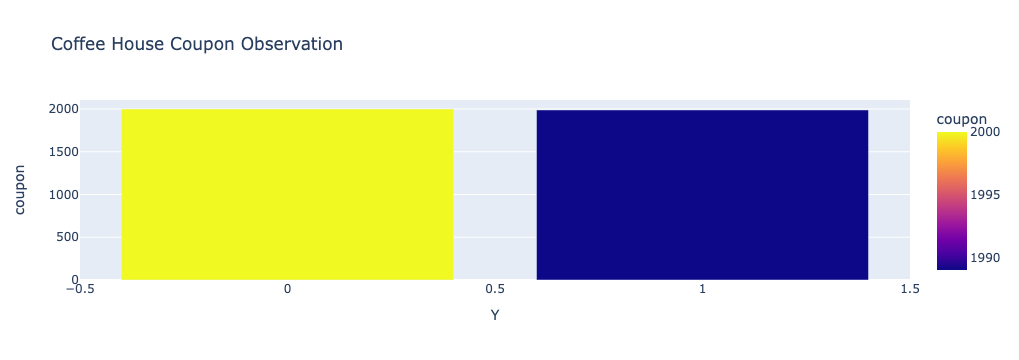

In [224]:
px.bar(observation_coffee_coupon, y='coupon', color = "coupon", title = "Coffee House Coupon Observation")

In [225]:
total_coffee_coupon_accepted = observation_coffee_coupon.iloc[1]['coupon']
print("total_coffee_coupon_accepted = " + str(total_coffee_coupon_accepted))

total_coffee_coupon_rejected = observation_coffee_coupon.iloc[0]['coupon']
print("total_coffee_coupon_rejected = " + str(total_coffee_coupon_rejected))

total_coffee_coupon = total_coffee_coupon_accepted + total_coffee_coupon_rejected
print("total_coffee_coupon = " + str(total_coffee_coupon))

perc_accepted_coffee_coupon = 100 * (total_coffee_coupon_accepted/total_coffee_coupon)

print (str(np.round(perc_accepted_coffee_coupon, 2)) + "% Coffee Coupon were accepted")

total_coffee_coupon_accepted = 1989
total_coffee_coupon_rejected = 2000
total_coffee_coupon = 3989
49.86% Coffee Coupon were accepted


Compare the acceptance rates between those drivers who:
a) go to coffee shop more than once a month, had passengers that were not a kid, and were not widowed OR
b) go to coffee shop more than once a month and are under the age of 30 

In [227]:
# a) go to coffee house more than once a month, had passengers that were not a kid, and were not widowed

#bar_coupon_accepted_by_more1
#bar_coupon_passangers
#Marital Status: single, married partner, unmarried partner, or widowed

coffee_coupon_accepted = coffee_coupon.query("Y==1").reset_index()

total_coffee_coupon_accepted = coffee_coupon_accepted.count()['coupon']
print("coffee_coupon_accepted = " + str(total_coffee_coupon_accepted))


coffee_coupon_accepted_by_more1 = coffee_coupon_accepted.query("CoffeeHouse == '1~3' or CoffeeHouse == '4~8' or CoffeeHouse == 'gt8'")

coffee_coupon_ms = coffee_coupon_accepted_by_more1.query("maritalStatus != 'widowed'")
count_coffee_coupon_ms = coffee_coupon_ms.count()['coupon']
print("count_coffee_coupon_ms = " + str(count_coffee_coupon_ms))
acceptance_ms = 100 * (count_coffee_coupon_ms/total_coffee_coupon_accepted)
print (str(np.round(acceptance_ms, 2)) + "% go to coffee house more than once a month, had passengers that were not a kid, and were not widowed")



coffee_coupon_accepted = 1989
count_coffee_coupon_ms = 1266
63.65% go to coffee house more than once a month, had passengers that were not a kid, and were not widowed


In [230]:
# b) go to coffee shop more than once a month and are under the age of 30

coffee_accepted_by_age_30 = coffee_coupon_accepted_by_more1.query("age < '30'")
count_coffee_coupon_accepted_by_age_30 = coffee_accepted_by_age_30.count()['coupon']
print("count_coffee_coupon_accepted_by_age_30 = " + str(count_coffee_coupon_accepted_by_age_30))
coffee_acceptance_by_age_30 = 100 * (count_coffee_coupon_accepted_by_age_30/total_coffee_coupon_accepted)

print (str(np.round(coffee_acceptance_by_age_30, 2)) + "% is the acceptance rate for people who go to coffe shop more than once a month and are under the age of 30")


count_coffee_coupon_accepted_by_age_30 = 589
29.61% is the acceptance rate for people who go to coffe shop more than once a month and are under the age of 30
